## DBA5106 Bonus challenge: Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Data understanding exploration

In [56]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [57]:
# understanding the dataset for heart disease
print('Number of features:', df.shape[1]-1) # deducting one because one column contains the target value
print('Number of observations:', df.shape[0])
df.describe()

Number of features: 13
Number of observations: 270


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
# transforming the target variable 'Heart Disease' into a binary variable such that Presence = 1 and Absence = 0
for i in range(len(df)):
    if df['Heart Disease'][i] == 'Presence':
        df.loc[i, 'Binary Heart Disease'] = 1
    else:
        df.loc[i, 'Binary Heart Disease'] = 0

df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Binary Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1.0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0.0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1.0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0.0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,0.0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,0.0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,0.0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,0.0


In [5]:
df['Binary Heart Disease'].value_counts()

0.0    150
1.0    120
Name: Binary Heart Disease, dtype: int64

Comment: We assume that the data is imbalanced in the following.

In [6]:
X = df.drop(['Heart Disease', 'Binary Heart Disease'], axis = 1)
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [7]:
y = df['Binary Heart Disease']
y

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
265    0.0
266    0.0
267    0.0
268    0.0
269    1.0
Name: Binary Heart Disease, Length: 270, dtype: float64

In [8]:
# standardizing the features in dataframe X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# creating a new dataframe with scaled features
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

# concatenating the scaled features with the target variable y
df_scaled['Binary Heart Disease'] = y

df_scaled

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Binary Heart Disease
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,1.0
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,0.0
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,1.0
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,0.0
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277,0.0
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277,0.0
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706,0.0
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032,0.0


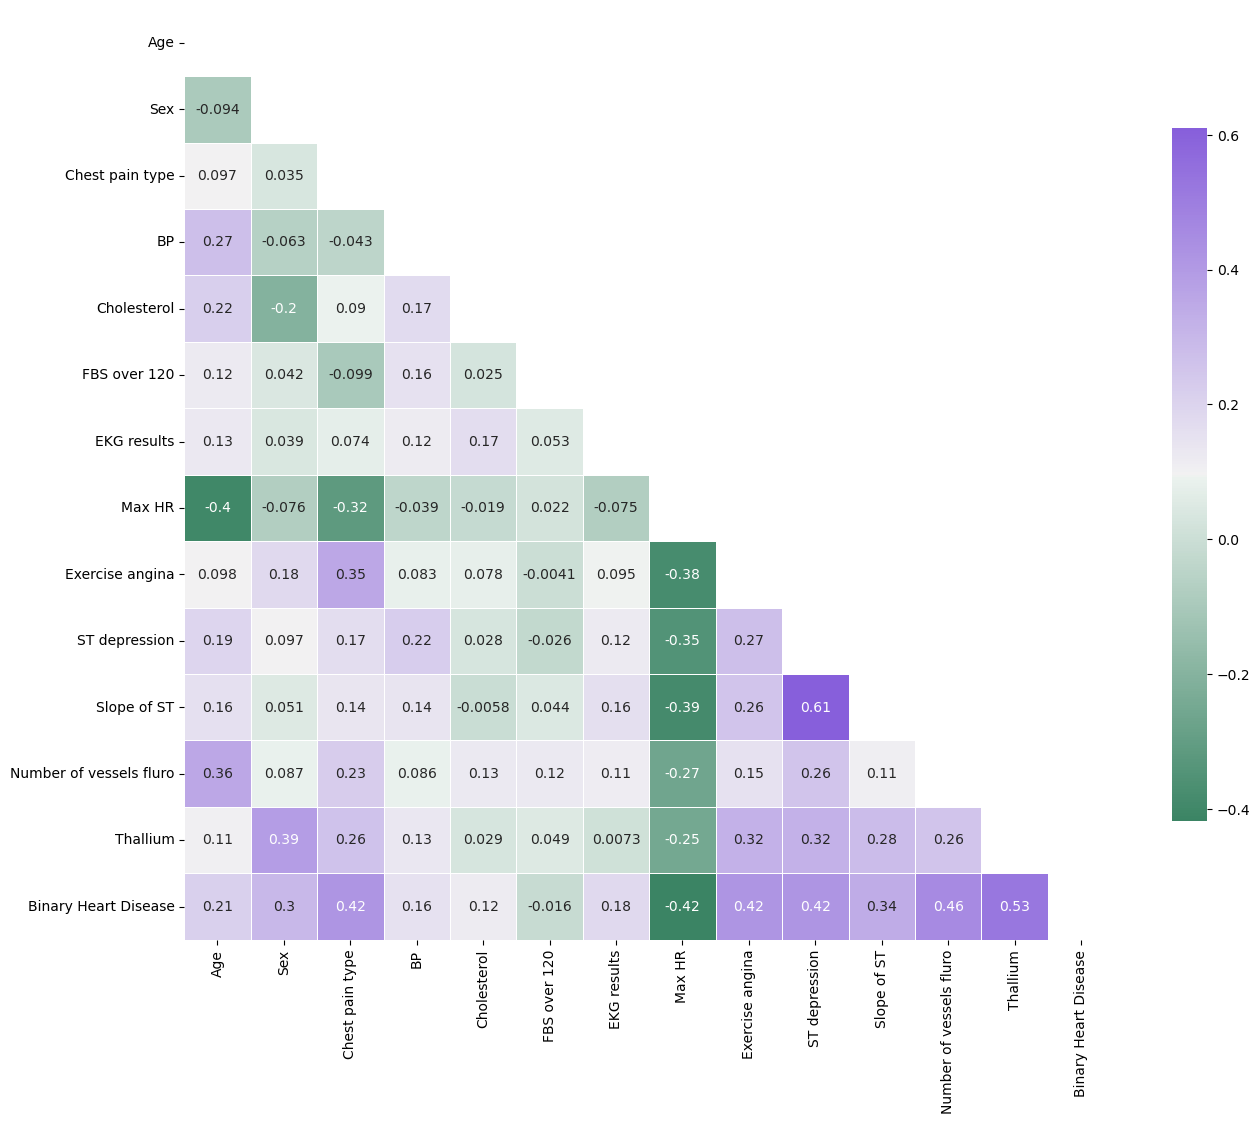

In [9]:
correlation_matrix = df_scaled.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True);

Comment: A correlation range of 0.6 and -0.4 between indicates moderate correlation between the features which may not impact the logistic regression classification model significantly.

In [10]:
# sorting the features in the order of their correlation to the target variable Heart Disease

# Get the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Binary Heart Disease'].abs()

# Sort features based on correlation strength
sorted_features = correlation_with_target.sort_values(ascending=False)

print(sorted_features)

Binary Heart Disease       1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Binary Heart Disease, dtype: float64


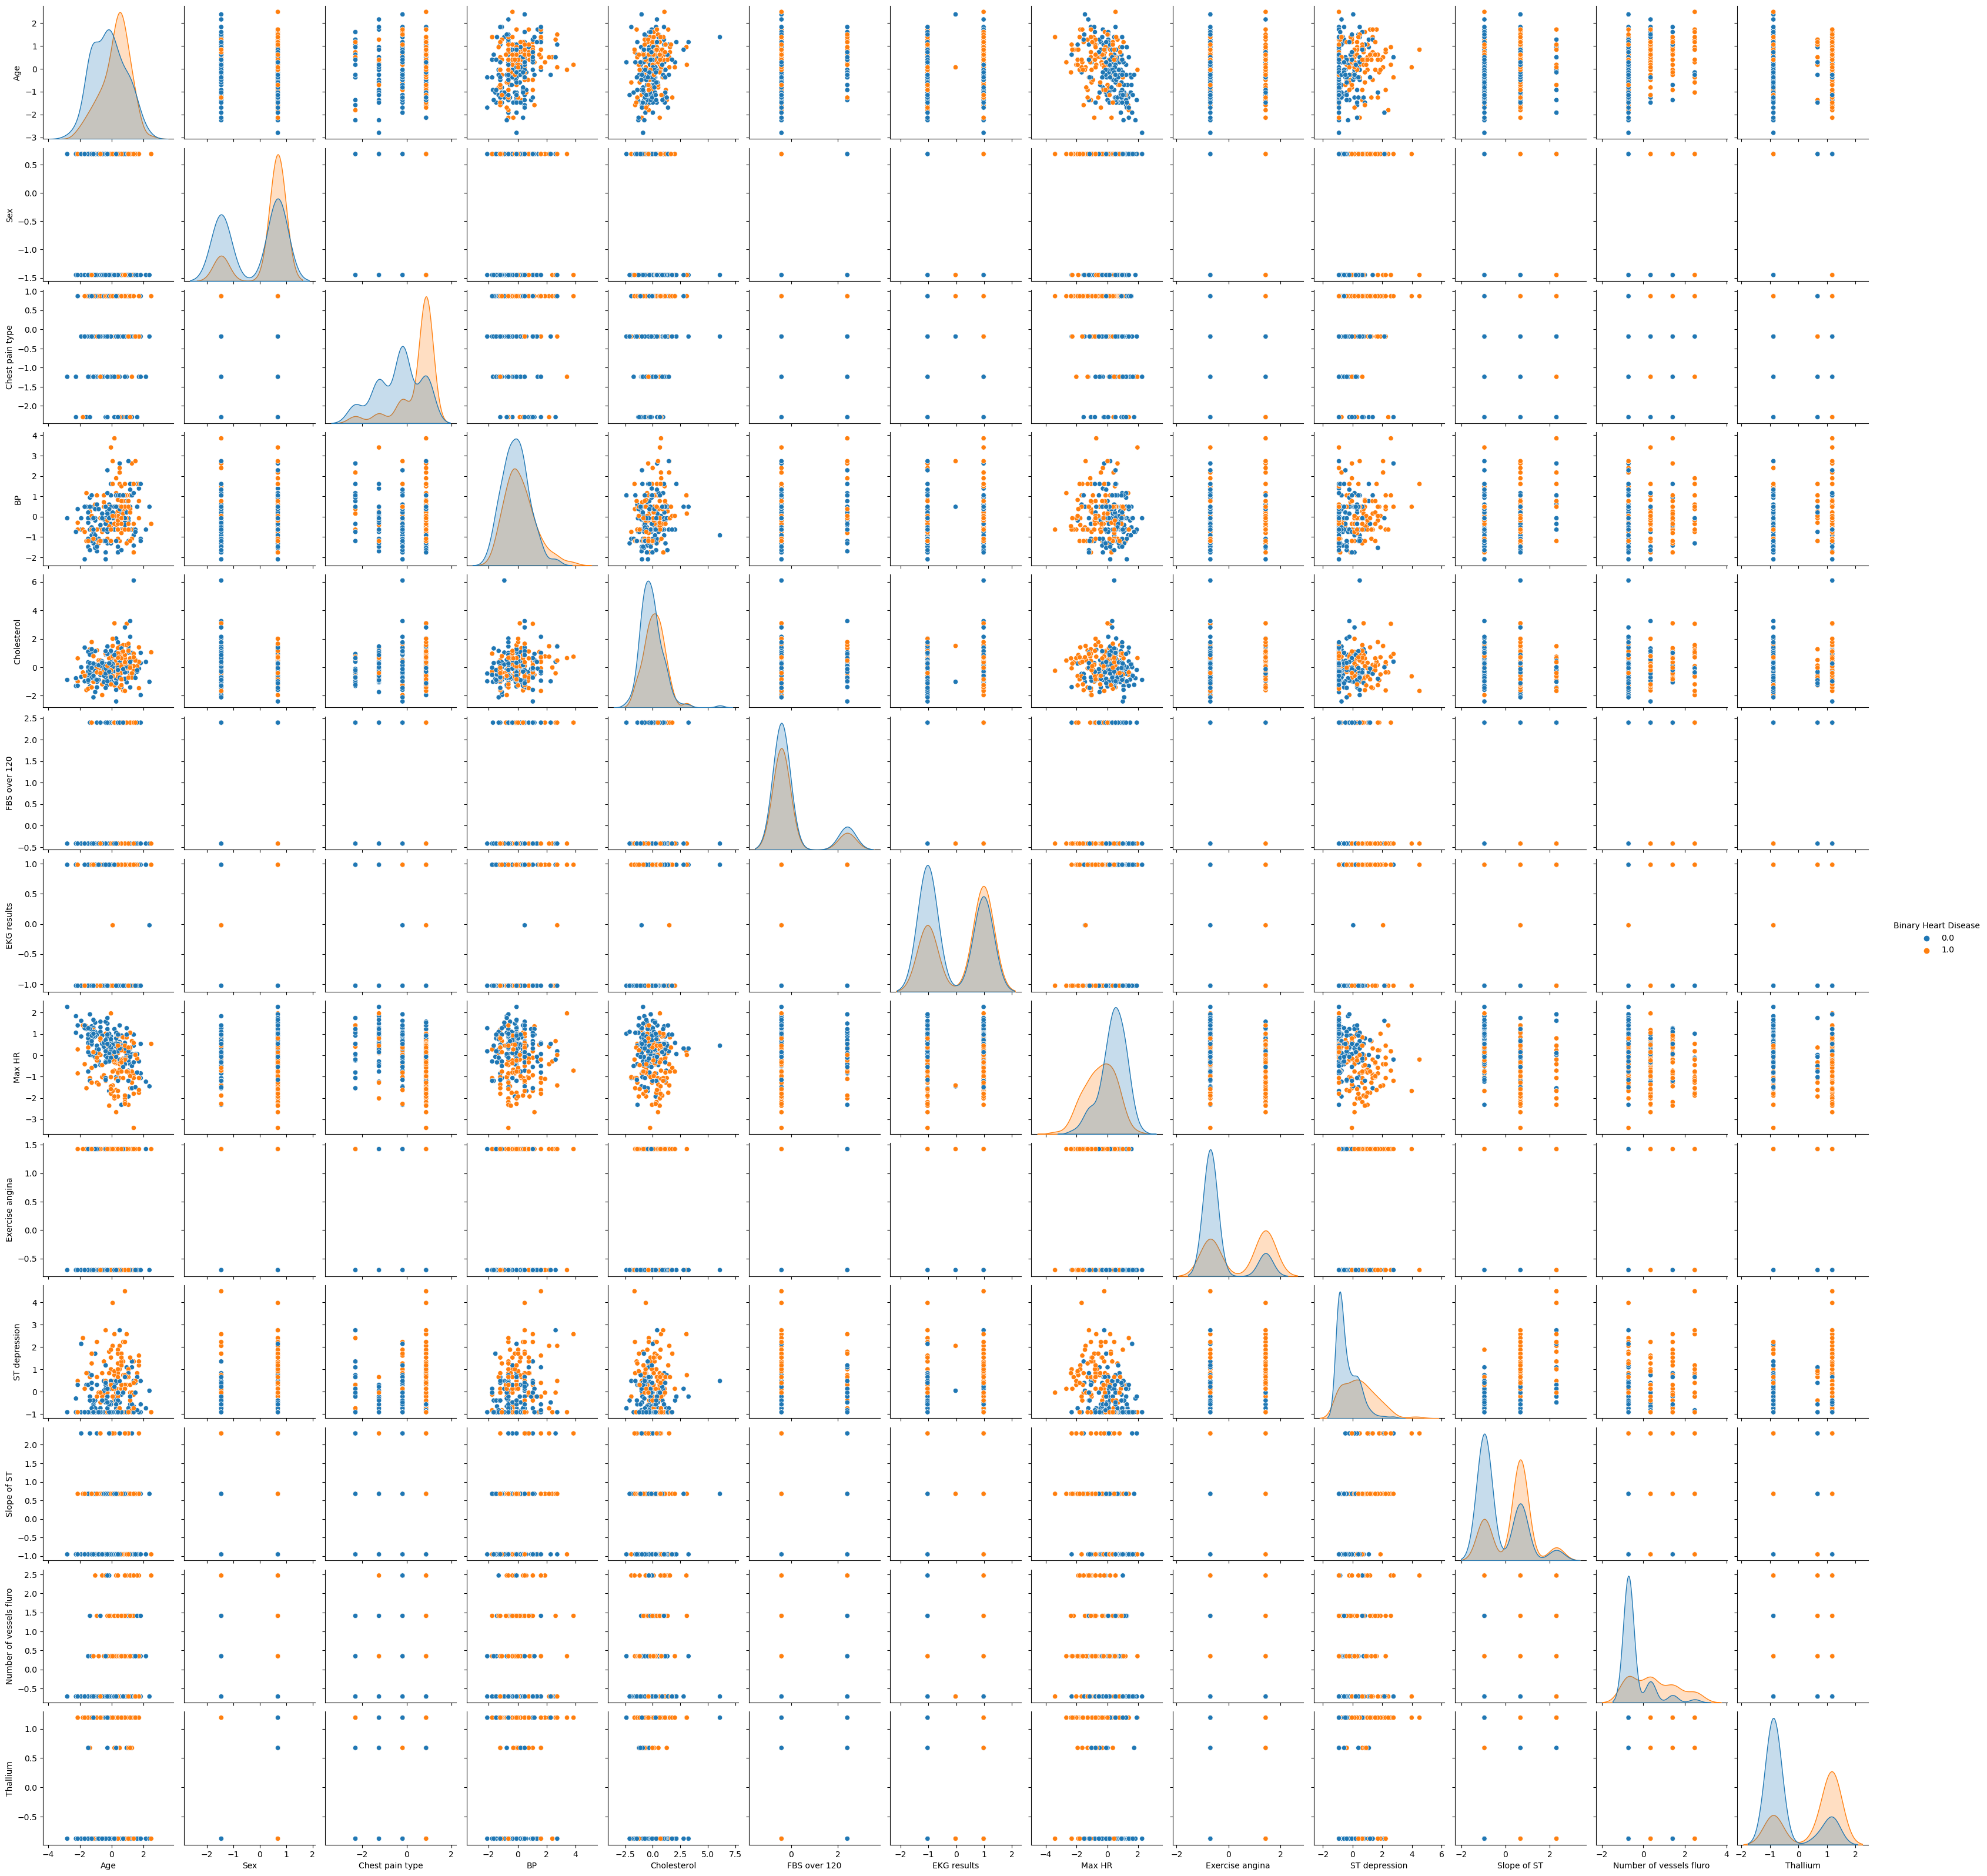

In [11]:
sns.pairplot(df_scaled, hue='Binary Heart Disease')

In [12]:
# transforming the scaled X dataframe back into a DataFrame
columns = X.columns
columns

X_scaled = pd.DataFrame(X_scaled, columns=columns)
X_scaled

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [13]:
# splitting the data into train and test parts for training the model and testing it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2023, stratify = y)
print('train data size:', len(X_train))
print('test data size:', len(X_test))

train data size: 216
test data size: 54


In [14]:
X_train.shape

(216, 13)

In [15]:
X_test.shape

(54, 13)

In [16]:
y_train.value_counts()[1] / len(y_train)

0.4444444444444444

In [17]:
y_test.value_counts()[1] / len(y_test)

0.4444444444444444

In [18]:
# Initialize stratified cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

## Baseline Logistic Regression Model

In [19]:
log_base = LogisticRegression(
    penalty = None,
    class_weight = 'balanced'
)

In [20]:
log_base.fit(X_train, y_train)
result = log_base.fit(X_train, y_train)

y_pred = log_base.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1.])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81        30
         1.0       0.76      0.79      0.78        24

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.79        54
weighted avg       0.80      0.80      0.80        54



In [22]:
balanced_accuracy_score(y_test, y_pred)

0.7958333333333334

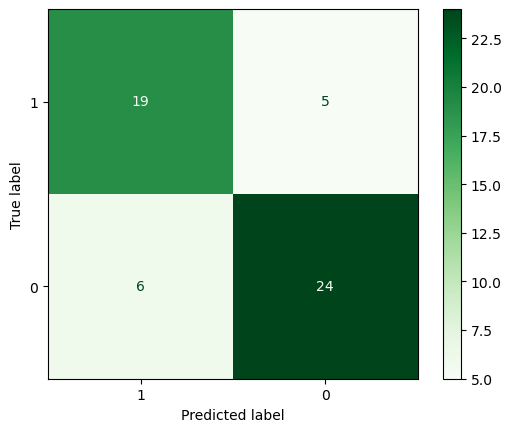

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred,
                                        labels = [1, 0], 
                                        cmap = 'Greens' # colormap
                                       )

In [24]:
tpr = 19 / (19+5)
print('The true positive rate of this baseline logistic regression model is', tpr)

The true positive rate of this baseline logistic regression model is 0.7916666666666666


In [25]:
tnr = 24 / (24+6)
print('The true negative rate of this baseline logistic regression model is', tnr)

The true negative rate of this baseline logistic regression model is 0.8


In [26]:
# looking at the sensitivity of the model by doing cross-validation
cv_results = cross_validate(log_base, X_scaled, y, scoring = {'balanced_accuracy', 'precision', 'recall', 'f1'}, cv = cv)
pd.DataFrame(cv_results)

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
0,0.007913,0.010003,0.875000,0.904167,0.893617,0.913043
1,0.005987,0.010004,0.791667,0.762500,0.745098,0.703704
2,0.005998,0.010002,0.791667,0.879167,0.863636,0.950000
3,0.006014,0.009987,0.875000,0.820833,0.807692,0.750000
4,0.005999,0.010003,0.708333,0.804167,0.772727,0.850000


In [27]:
pd.DataFrame(cv_results).describe()

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.006382,0.010000,0.808333,0.834167,0.816554,0.833349
std,0.000856,0.000007,0.069722,0.057312,0.061767,0.104870
min,0.005987,0.009987,0.708333,0.762500,0.745098,0.703704
25%,0.005998,0.010002,0.791667,0.804167,0.772727,0.750000
50%,0.005999,0.010003,0.791667,0.820833,0.807692,0.850000
75%,0.006014,0.010003,0.875000,0.879167,0.863636,0.913043
max,0.007913,0.010004,0.875000,0.904167,0.893617,0.950000


In [28]:
pd.DataFrame(cv_results).mean()

fit_time                  0.006382
score_time                0.010000
test_recall               0.808333
test_balanced_accuracy    0.834167
test_f1                   0.816554
test_precision            0.833349
dtype: float64

In [29]:
# receiving the baseline models coefficients

# Access coefficients
coefficients = log_base.coef_[0]
intercept = log_base.intercept_[0]

# Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coef_df)
print('Intercept:', intercept)

                    Feature  Coefficient
0                       Age    -0.197317
1                       Sex     1.089454
2           Chest pain type     0.501746
3                        BP     0.333559
4               Cholesterol     0.599527
5              FBS over 120    -0.177000
6               EKG results     0.453062
7                    Max HR    -0.456423
8           Exercise angina     0.108072
9             ST depression     0.650980
10              Slope of ST    -0.033764
11  Number of vessels fluro     1.121394
12                 Thallium     0.659895
Intercept: -0.08129276452510927


## Logistic Regression Model with Ridge

In [30]:
log_ridge = LogisticRegression(
    penalty = 'l2',
    C=0.1,
    class_weight = 'balanced'
)

In [31]:
log_ridge.fit(X_train, y_train)
result = log_ridge.fit(X_train, y_train)

y_pred = log_ridge.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1.])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        30
         1.0       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [33]:
balanced_accuracy_score(y_test, y_pred)

0.8125

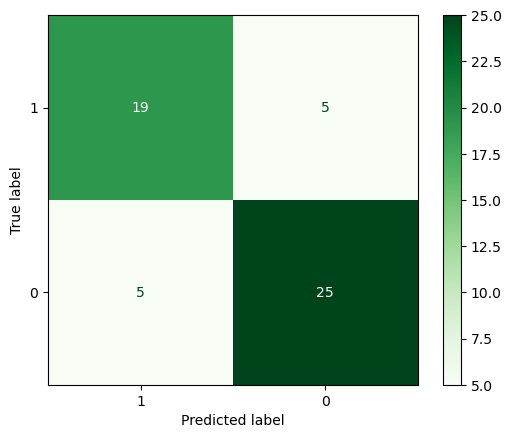

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred,
                                        labels = [1, 0], 
                                        cmap = 'Greens' # colormap
                                       )

In [35]:
tpr = 19 / (19+5)
print('The true positive rate of this baseline logistic regression model is', tpr)

The true positive rate of this baseline logistic regression model is 0.7916666666666666


In [36]:
tnr = 25 / (25+5)
print('The true negative rate of this baseline logistic regression model is', tnr)

The true negative rate of this baseline logistic regression model is 0.8333333333333334


In [37]:
# looking at the sensitivity of the model by doing cross-validation
cv_results = cross_validate(log_ridge, X_scaled, y, scoring = {'balanced_accuracy', 'precision', 'recall', 'f1'}, cv = cv)
pd.DataFrame(cv_results)

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
0,0.019088,0.021995,0.916667,0.941667,0.936170,0.956522
1,0.010963,0.017993,0.791667,0.795833,0.775510,0.760000
2,0.010052,0.014016,0.791667,0.879167,0.863636,0.950000
3,0.008006,0.013913,0.875000,0.820833,0.807692,0.750000
4,0.009048,0.013943,0.708333,0.787500,0.755556,0.809524


In [38]:
pd.DataFrame(cv_results).describe()

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.011431,0.016372,0.816667,0.845000,0.827713,0.845209
std,0.004420,0.003597,0.081223,0.064845,0.073120,0.101206
min,0.008006,0.013913,0.708333,0.787500,0.755556,0.750000
25%,0.009048,0.013943,0.791667,0.795833,0.775510,0.760000
50%,0.010052,0.014016,0.791667,0.820833,0.807692,0.809524
75%,0.010963,0.017993,0.875000,0.879167,0.863636,0.950000
max,0.019088,0.021995,0.916667,0.941667,0.936170,0.956522


In [39]:
pd.DataFrame(cv_results).mean()

fit_time                  0.011431
score_time                0.016372
test_recall               0.816667
test_balanced_accuracy    0.845000
test_f1                   0.827713
test_precision            0.845209
dtype: float64

In [40]:
# receiving the baseline models coefficients

# Access coefficients
coefficients = log_ridge.coef_[0]
intercept = log_ridge.intercept_[0]

# Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coef_df)
print('Intercept:', intercept)

                    Feature  Coefficient
0                       Age    -0.011836
1                       Sex     0.602722
2           Chest pain type     0.352136
3                        BP     0.175142
4               Cholesterol     0.283270
5              FBS over 120    -0.095613
6               EKG results     0.279689
7                    Max HR    -0.309650
8           Exercise angina     0.164801
9             ST depression     0.418082
10              Slope of ST     0.087908
11  Number of vessels fluro     0.666977
12                 Thallium     0.536255
Intercept: -0.0848374620965903


## Logistic Regression with Lasso

In [41]:
log_lasso = LogisticRegression(
    penalty = 'l1',
    C=0.1,
    solver='saga',
    class_weight = 'balanced'
)

In [42]:
log_lasso.fit(X_train, y_train)
result = log_lasso.fit(X_train, y_train)

y_pred = log_lasso.predict(X_test)
y_pred

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1.])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        30
         1.0       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [44]:
balanced_accuracy_score(y_test, y_pred)

0.8166666666666667

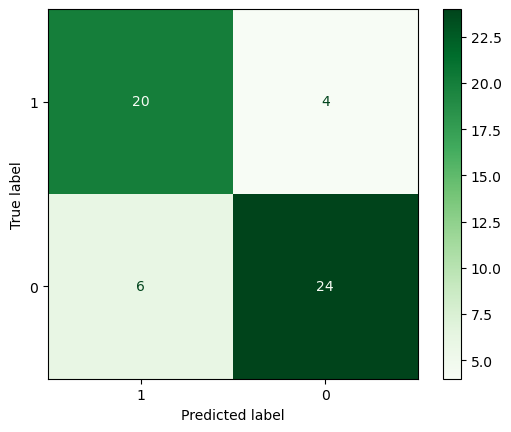

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred,
                                        labels = [1, 0], 
                                        cmap = 'Greens' # colormap
                                       )

In [58]:
tpr = 20 / (20+4)
print('The true positive rate of this baseline logistic regression model is', tpr)

The true positive rate of this baseline logistic regression model is 0.8333333333333334


In [59]:
tnr = 24 / (24+6)
print('The true negative rate of this baseline logistic regression model is', tnr)

The true negative rate of this baseline logistic regression model is 0.8


In [48]:
# looking at the sensitivity of the model by doing cross-validation
cv_results = cross_validate(log_lasso, X_scaled, y, scoring = {'balanced_accuracy', 'precision', 'recall', 'f1'}, cv = cv)
pd.DataFrame(cv_results)

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
0,0.012001,0.021989,0.833333,0.916667,0.909091,1.000000
1,0.008998,0.014999,0.791667,0.779167,0.760000,0.730769
2,0.007999,0.014000,0.791667,0.845833,0.826087,0.863636
3,0.007035,0.013999,0.958333,0.862500,0.851852,0.766667
4,0.007012,0.014003,0.708333,0.737500,0.708333,0.708333


In [49]:
pd.DataFrame(cv_results).describe()

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.008609,0.015798,0.816667,0.828333,0.811073,0.813881
std,0.002065,0.003488,0.091287,0.070612,0.078517,0.119784
min,0.007012,0.013999,0.708333,0.737500,0.708333,0.708333
25%,0.007035,0.014000,0.791667,0.779167,0.760000,0.730769
50%,0.007999,0.014003,0.791667,0.845833,0.826087,0.766667
75%,0.008998,0.014999,0.833333,0.862500,0.851852,0.863636
max,0.012001,0.021989,0.958333,0.916667,0.909091,1.000000


In [50]:
pd.DataFrame(cv_results).mean()

fit_time                  0.008609
score_time                0.015798
test_recall               0.816667
test_balanced_accuracy    0.828333
test_f1                   0.811073
test_precision            0.813881
dtype: float64

In [60]:
# receiving the baseline models coefficients

# Access coefficients
coefficients = log_lasso.coef_[0]
intercept = log_lasso.intercept_[0]

# Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coef_df)
print('Intercept:', intercept)

                    Feature  Coefficient
0                       Age     0.000000
1                       Sex     0.351212
2           Chest pain type     0.202300
3                        BP     0.000000
4               Cholesterol     0.051340
5              FBS over 120     0.000000
6               EKG results     0.128596
7                    Max HR    -0.222694
8           Exercise angina     0.028826
9             ST depression     0.381270
10              Slope of ST     0.000000
11  Number of vessels fluro     0.564694
12                 Thallium     0.562296
Intercept: -0.07499388957084961


## Alternative base logistic regression model: fewer features

In [64]:
X_scaled_reduced = X_scaled.drop(['Age', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'Slope of ST'], axis=1)
X_scaled_reduced

,Sex,Chest pain type,ST depression,Number of vessels fluro,Thallium
0,0.689500,0.870928,1.181012,2.472682,-0.875706
1,-1.450327,-0.183559,0.481153,-0.711535,1.189277
2,0.689500,-1.238045,-0.656118,-0.711535,1.189277
3,0.689500,0.870928,-0.743600,0.349871,1.189277
4,-1.450327,-1.238045,-0.743600,0.349871,-0.875706
...,...,...,...,...,...
265,0.689500,-0.183559,-0.481153,-0.711535,1.189277
266,0.689500,-1.238045,-0.918565,-0.711535,1.189277
267,-1.450327,-1.238045,0.218706,-0.711535,-0.875706
268,0.689500,0.870928,-0.568636,-0.711535,0.673032


In [71]:
# splitting the data into train and test parts for training the model and testing it
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reduced, y, test_size=0.2, random_state=2023, stratify = y)
print('train data size:', len(X_train))
print('test data size:', len(X_test))

train data size: 216
test data size: 54


In [72]:
log_reduced = LogisticRegression(
    penalty = None,
    class_weight = 'balanced'
)

In [73]:
log_reduced.fit(X_train, y_train)
result = log_reduced.fit(X_train, y_train)

y_pred = log_reduced.predict(X_test)
y_pred

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0.])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        30
         1.0       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [75]:
balanced_accuracy_score(y_test, y_pred)

0.8166666666666667

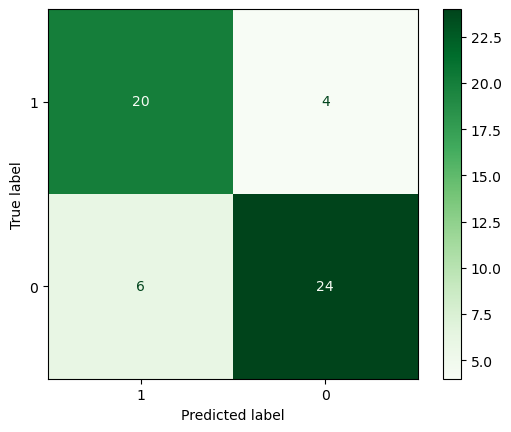

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred,
                                        labels = [1, 0], 
                                        cmap = 'Greens' # colormap
                                       )

In [77]:
tpr = 20 / (20+4)
print('The true positive rate of this baseline logistic regression model is', tpr)

The true positive rate of this baseline logistic regression model is 0.8333333333333334


In [78]:
tnr = 24 / (24+6)
print('The true negative rate of this baseline logistic regression model is', tnr)

The true negative rate of this baseline logistic regression model is 0.8


In [79]:
# looking at the sensitivity of the model by doing cross-validation
cv_results = cross_validate(log_reduced, X_scaled_reduced, y, scoring = {'balanced_accuracy', 'precision', 'recall', 'f1'}, cv = cv)
pd.DataFrame(cv_results)

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
0,0.007041,0.011961,0.833333,0.866667,0.851064,0.869565
1,0.006997,0.013007,0.833333,0.833333,0.816327,0.800000
2,0.007996,0.014055,0.750000,0.808333,0.782609,0.818182
3,0.008992,0.012952,0.916667,0.841667,0.830189,0.758621
4,0.007053,0.011994,0.708333,0.754167,0.723404,0.739130


In [80]:
pd.DataFrame(cv_results).describe()

,fit_time,score_time,test_recall,test_balanced_accuracy,test_f1,test_precision
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.007616,0.012794,0.808333,0.820833,0.800718,0.797100
std,0.000876,0.000865,0.081223,0.042696,0.049880,0.051345
min,0.006997,0.011961,0.708333,0.754167,0.723404,0.739130
25%,0.007041,0.011994,0.750000,0.808333,0.782609,0.758621
50%,0.007053,0.012952,0.833333,0.833333,0.816327,0.800000
75%,0.007996,0.013007,0.833333,0.841667,0.830189,0.818182
max,0.008992,0.014055,0.916667,0.866667,0.851064,0.869565


In [81]:
pd.DataFrame(cv_results).mean()

fit_time                  0.007616
score_time                0.012794
test_recall               0.808333
test_balanced_accuracy    0.820833
test_f1                   0.800718
test_precision            0.797100
dtype: float64

In [84]:
# receiving the baseline models coefficients

# Access coefficients
coefficients = log_reduced.coef_[0]
intercept = log_reduced.intercept_[0]

# Display coefficients
coef_df = pd.DataFrame({'Feature': X_scaled_reduced.columns, 'Coefficient': coefficients})
print(coef_df)
print('Intercept:', intercept)

                   Feature  Coefficient
0                      Sex     0.667068
1          Chest pain type     0.546964
2            ST depression     0.799667
3  Number of vessels fluro     1.036507
4                 Thallium     0.726340
Intercept: -0.032409896544565435


## Testing the models using test data